### Use the air bnb new york city data set and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.

In [5]:
import pandas as pd
from matplotlib import pyplot as plot

In [6]:
df = pd.read_csv("AB_NYC_2019.csv")
df.shape

(48895, 16)

In [20]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


(array([2.1877e+04, 1.7233e+04, 5.8670e+03, 1.9300e+03, 7.5300e+02,
        3.7600e+02, 2.2300e+02, 1.6200e+02, 1.0100e+02, 7.5000e+01,
        7.1000e+01, 2.0000e+01, 2.3000e+01, 1.1000e+01, 8.0000e+00,
        2.9000e+01, 5.0000e+00, 1.2000e+01, 4.0000e+00, 5.0000e+00,
        2.5000e+01, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        1.3000e+01, 3.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00,
        8.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

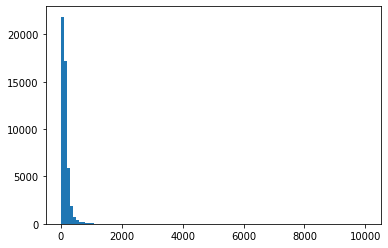

In [34]:
plot.hist(df.price,bins = 100,histtype='bar')

In [27]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [165]:
min_thresold, max_thresold = df.price.quantile([0.01,0.999])
min_thresold, max_thresold

(30.0, 3000.0)

In [170]:
outlier = df[(df.price<min_thresold)|(df.price>max_thresold)]
outlier.shape

(449, 16)

In [171]:
df.shape

(48895, 16)

In [175]:
df2 = df[(df.price>=min_thresold)&(df.price<=max_thresold)]
df2.shape

(48446, 16)

In [176]:
number_of_outlier = df.shape[0]-df2.shape[0]
number_of_outlier

449

In [177]:
df2.price.describe()


count    48446.000000
mean       148.617698
std        157.733917
min         30.000000
25%         70.000000
50%        109.000000
75%        177.000000
max       3000.000000
Name: price, dtype: float64

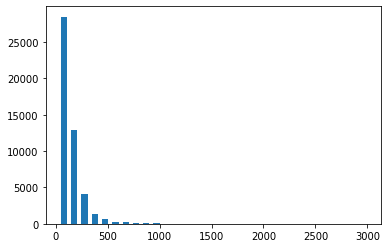

In [183]:
plot.hist(df2.price,bins = 30,rwidth=0.6,histtype='bar')
xscale=(min_thresold, max_thresold)